# Superstore Sales Workflow Tutorial

This notebook walks through cleaning the Superstore dataset, designing a relational structure, creating an SQLite database, and running example SQL queries and visualizations.

In [49]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker


## 1️) Load and Inspect the Dataset

In [50]:
# reading error codes + research is how you can learn if there is different encoding, as seen below
df = pd.read_csv('../data/Superstore.csv', encoding='ISO-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52


### Double check some datatypes, and for nulls and duplicates:

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [52]:
df.duplicated().sum()

np.int64(0)

In [53]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

This data is incredibly clean - we can see there are no null values and no duplicates. However, there are some dates that could be saved in a better format.

## 2) Data Cleaning

In [54]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

In [55]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [56]:
df.Segment.unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [57]:
df.rename(columns={"Segment":"customer_category"}, inplace=True)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,customer_category,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52


With real data, it is very likely more cleaning and wrangling would be required. 

## 3) Build Relational Tables

In [58]:
conn = sqlite3.connect('superstore.db')

customers_df = df[['Customer ID','Customer Name','customer_category','City','State','Region']].drop_duplicates().rename(columns={
    'Customer ID':'customer_id',
    'Customer Name':'customer_name',
    'City':'city',
    'State':'state',
    'Region':'region'
})

products_df = df[['Product ID','Category','Sub-Category','Product Name']].drop_duplicates().rename(columns={
    'Product ID':'product_id',
    'Category':'category',
    'Sub-Category':'subcategory',
    'Product Name':'product_name'
})

orders_df = df[['Order ID','Order Date','Ship Date','Ship Mode','Customer ID']].drop_duplicates().rename(columns={
    'Order ID':'order_id',
    'Order Date':'order_date',
    'Ship Date':'ship_date',
    'Ship Mode':'ship_mode',
    'Customer ID':'customer_id'
})

order_details_df = df[['Order ID','Product ID','Sales','Quantity','Discount','Profit']].rename(columns={
    'Order ID':'order_id',
    'Product ID':'product_id'
})

customers_df.to_sql('customers', conn, index=False, if_exists='replace')
products_df.to_sql('products', conn, index=False, if_exists='replace')
orders_df.to_sql('orders', conn, index=False, if_exists='replace')
order_details_df.to_sql('order_details', conn, index=False, if_exists='replace')
conn.commit()

## 4) Make Some Queries!

### Which customer segments bring in the most revenue and profit?

In [59]:
query1 = """ SELECT 
    c.customer_category,
    ROUND(SUM(od.sales), 2) AS total_sales,
    ROUND(SUM(od.profit), 2) AS total_profit
FROM order_details od
JOIN orders o ON od.order_id = o.order_id
JOIN customers c ON o.customer_id = c.customer_id
GROUP BY c.customer_category
ORDER BY total_sales DESC;
"""
result1 = pd.read_sql(query1, conn)
result1

,customer_category,total_sales,total_profit
0,Consumer,"7,954,360.98","923,657.52"
1,Corporate,"4,768,494.07","622,614.73"
2,Home Office,"2,808,676.56","403,920.45"


### What are the top 10 customers by total sales?

In [60]:
query2 = """ 
select customer_name, sum(sales) as total_sales 
from order_details od
join orders o
on od.order_id = o.order_id
join customers c
on o.customer_id = c.customer_id
group by customer_name
order by total_sales desc
limit 10
"""
result2 = pd.read_sql(query2, conn)
result2

,customer_name,total_sales
0,Ken Lonsdale,"141,752.29"
1,Sanjit Engle,"134,303.82"
2,Adrian Barton,"130,262.14"
3,Sean Miller,"125,215.25"
4,Clay Ludtke,"119,686.01"
5,Sanjit Chand,"113,138.67"
6,Seth Vernon,"103,238.55"
7,Zuschuss Carroll,"96,308.48"
8,Maria Etezadi,"95,973.55"
9,Laura Armstrong,"95,405.44"


### Which product categories and subcategories are the most profitable overall?

In [61]:
query3 = """
Select category, subcategory, sum(profit) as total_profit
from products p
join order_details od
on p.product_id = od.product_id
group by category, subcategory
order by total_profit DESC"""
result3 = pd.read_sql(query3, conn)
result3

,category,subcategory,total_profit
0,Technology,Copiers,"55,617.82"
1,Technology,Accessories,"48,359.05"
2,Technology,Phones,"46,936.19"
3,Office Supplies,Paper,"36,994.53"
4,Office Supplies,Binders,"30,373.20"
5,Furniture,Chairs,"26,707.65"
6,Office Supplies,Storage,"21,408.70"
7,Office Supplies,Appliances,"18,514.49"
8,Furniture,Furnishings,"14,569.59"
9,Office Supplies,Envelopes,"6,964.18"


### What is the average discount given per category?

In [62]:
query4 = """
select category, avg(discount) as avg_discount
from order_details od
join products p
on od.product_id = p.product_id
group by category
order by avg_discount desc"""
result4 = pd.read_sql(query4, conn)
result4

,category,avg_discount
0,Furniture,0.17
1,Office Supplies,0.16
2,Technology,0.13


### Which states or regions contribute the most to total sales?

In [63]:
pd.options.display.float_format = '{:,.2f}'.format

query5 = """
select c.state, sum(od.sales) as total_sales 
from order_details od
join orders o
on od.order_id = o.order_id
join customers c
on o.customer_id = c.customer_id
group by c.state
order by total_sales desc
limit 10

"""
result5 = pd.read_sql(query5, conn)
result5

,state,total_sales
0,California,"2,991,943.64"
1,New York,"1,572,500.02"
2,Texas,"1,495,331.47"
3,Pennsylvania,"814,279.89"
4,Illinois,"797,721.17"
5,Washington,"783,999.74"
6,Ohio,"707,747.69"
7,Florida,"635,637.78"
8,North Carolina,"437,938.43"
9,Michigan,"432,428.02"


### How many orders were shipped late (where Ship Date > Order Date + 3 days)?

In [64]:
query6 = """ 
SELECT COUNT(*) AS orders_shipped_late
FROM orders
WHERE DATE(ship_date) > DATE(order_date, '+3 days');
 """
result6 = pd.read_sql(query6, conn)
result6

,orders_shipped_late
0,3391


### Which month or year had the highest total sales?

In [65]:
query7 = """ 
SELECT 
  STRFTIME('%Y-%m', o.order_date) AS year_month,
  SUM(od.sales) AS total_sales
FROM order_details od
JOIN orders o 
ON od.order_id = o.order_id
GROUP BY year_month
ORDER BY total_sales DESC
LIMIT 1;
"""
result7 = pd.read_sql(query7, conn)
result7

,year_month,total_sales
0,2014-11,"112,326.47"


### What are the most frequently ordered products?

In [66]:
query8 = """  
select p.product_name, COUNT(*) AS order_count
FROM order_details od
JOIN products p ON od.product_id = p.product_id
GROUP BY p.product_name
ORDER BY order_count DESC
LIMIT 10;
 """
result8 = pd.read_sql(query8, conn)
result8

,product_name,order_count
0,Staples,227
1,Avery Non-Stick Binders,20
2,Xerox 1908,19
3,Xerox 1881,19
4,Logitech P710e Mobile Speakerphone,18
5,KI Adjustable-Height Table,18
6,Imation 16GB Mini TravelDrive USB 2.0 Flash Drive,18
7,Storex Dura Pro Binders,17
8,"Executive Impressions 13"" Clairmont Wall Clock",16
9,"Eldon Image Series Desk Accessories, Burgundy",16


### Which customers placed more than 5 orders total?

In [43]:
query9 = """ 
SELECT 
  c.customer_id,
  c.customer_name,
  COUNT(o.order_id) AS order_count
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
GROUP BY c.customer_id, c.customer_name
HAVING COUNT(o.order_id) > 5
ORDER BY order_count DESC;
 """
result9 = pd.read_sql(query9, conn)
result9

,customer_id,customer_name,order_count
0,EP-13915,Emily Phan,255
1,JE-15745,Joel Eaton,169
2,EA-14035,Erin Ashbrook,156
3,NS-18640,Noel Staavos,156
4,ZC-21910,Zuschuss Carroll,156
...,...,...,...
742,SW-20350,Sean Wendt,9
743,TM-21490,Tony Molinari,9
744,TT-21265,Tim Taslimi,9
745,VP-21730,Victor Preis,9


### What’s the profit margin (profit ÷ sales) by category or segment?

In [44]:
query10 = """ 
SELECT 
  p.category, 
  ROUND(SUM(od.profit) / SUM(od.sales), 4) AS profit_margin
FROM order_details od
JOIN products p ON od.product_id = p.product_id
GROUP BY p.category
ORDER BY profit_margin DESC; """
result10 = pd.read_sql(query10, conn)
result10

,category,profit_margin
0,Technology,0.17
1,Office Supplies,0.17
2,Furniture,0.03


### 5) Visualize it!

From your ten results, select at least 4 to utilize in a meaningful visualization. 

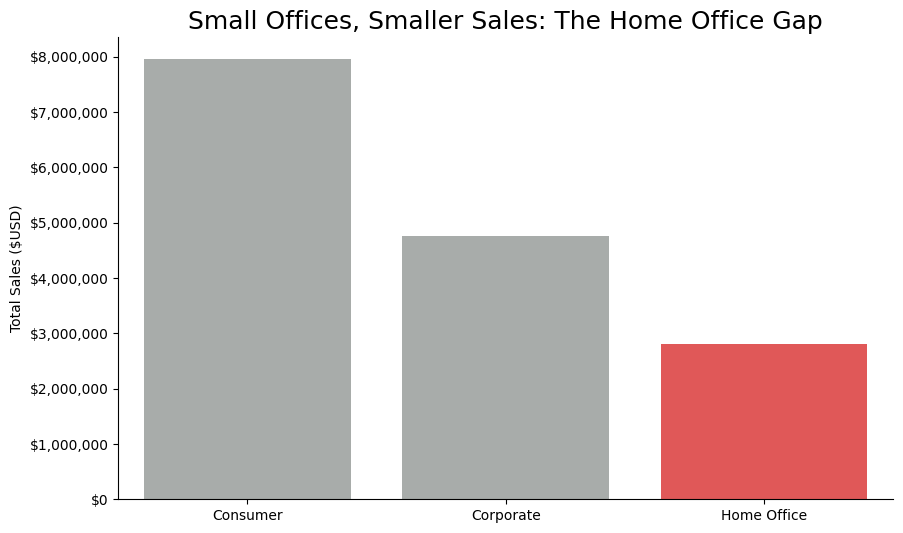

In [67]:
# example using result1
plt.figure(figsize=(10,6))
colors = ["#a7adaa", "#a7adaa", "#f74141" ]
sns.barplot(result1, x='customer_category', y='total_sales', palette=colors, hue='customer_category', legend=False)
plt.title('Small Offices, Smaller Sales: The Home Office Gap',fontsize=18)
plt.xlabel(None)
plt.ylabel('Total Sales ($USD)')

#for those wondering how to get rid of scientific notation! Set style to plain:
plt.ticklabel_format(style='plain', axis='y')

#mticker is a great library for helping tick mark formatting, such as adding commas and dollar signs in this case
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

#using the seaborn library, despining is way easier!
sns.despine()
plt.show()


#### Pie Chart

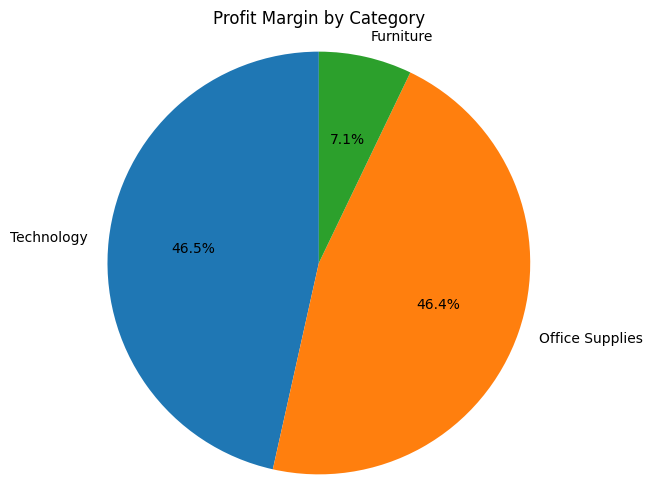

In [68]:
plt.figure(figsize=(6, 6))
plt.pie(result10['profit_margin'], labels=result10['category'], autopct='%1.1f%%', startangle=90)
plt.title('Profit Margin by Category')
plt.axis('equal')
plt.show()



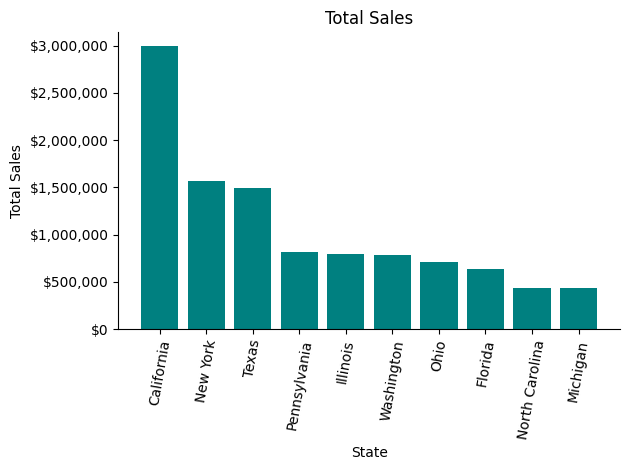

In [78]:
# visualization two code here

# Create bar plot
plt.bar(result5['state'], result5['total_sales'], color='teal')
plt.ticklabel_format(style='plain', axis='y')
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.title('Total Sales')
plt.xticks(rotation=80)
plt.tight_layout()
sns.despine()
plt.show()



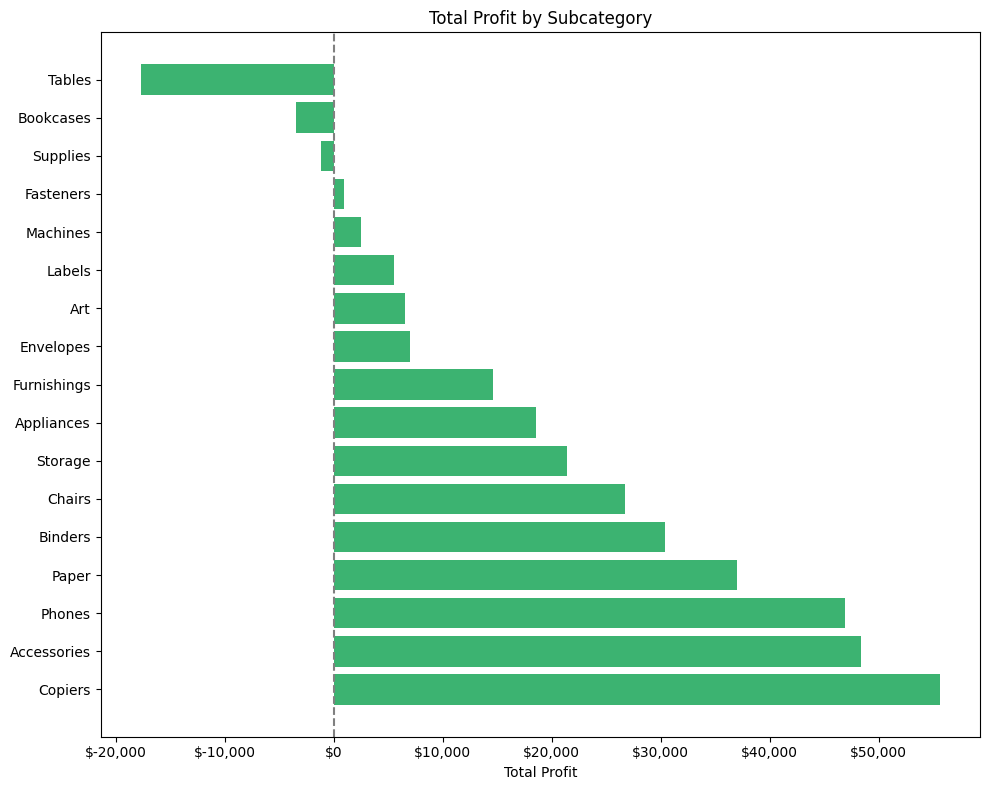

In [ ]:
# visualization three code here

plt.figure(figsize=(10, 8))
plt.barh(result3['subcategory'], result3['total_profit'], color='mediumseagreen')
ax = plt.gca()
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.xlabel('Total Profit')
plt.title('Total Profit by Subcategory')
plt.axvline(0, color='gray', linestyle='--')  # Show zero line for negatives
plt.tight_layout()
plt.show()


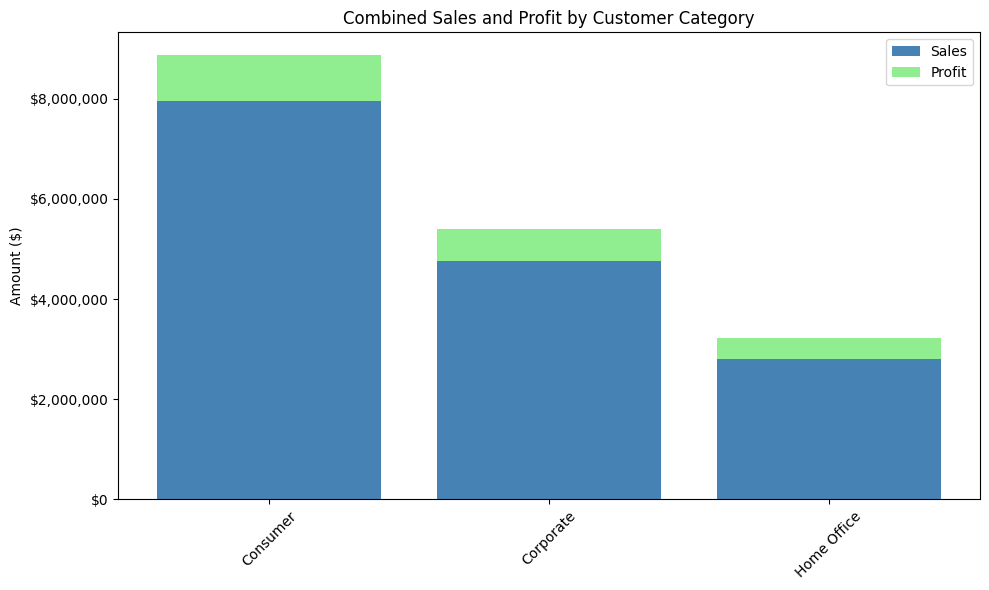

In [83]:
# visualization four code here

plt.figure(figsize=(10, 6))
plt.bar(result1['customer_category'], result1['total_sales'], label='Sales', color='steelblue')
plt.bar(result1['customer_category'], result1['total_profit'], bottom=result1['total_sales'], label='Profit', color='lightgreen')
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.xticks(rotation=45)
plt.ylabel('Amount ($)')
plt.title('Combined Sales and Profit by Customer Category')
plt.legend()
plt.tight_layout()
plt.show()
